In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/gld_price_data.csv')

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.shape

(2290, 6)

In [6]:
df.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [7]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
df = df.drop('Date',axis=1)

** Data Visualization**

In [10]:
correlation = df.corr()

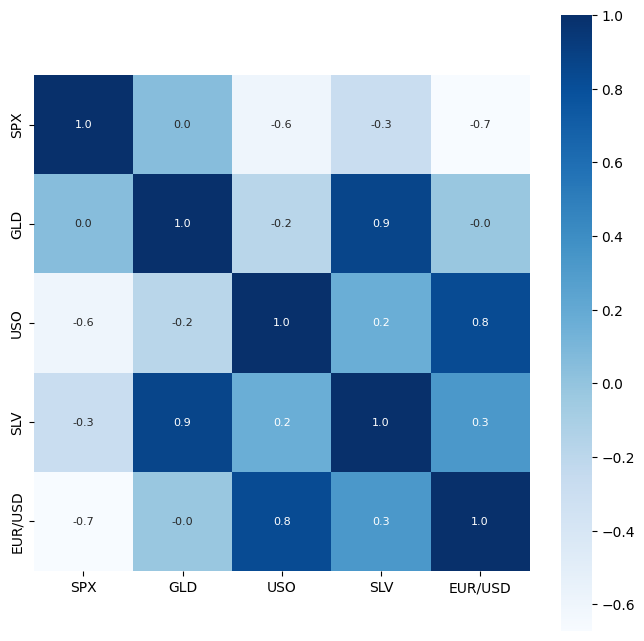

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')
plt.show()

In [14]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


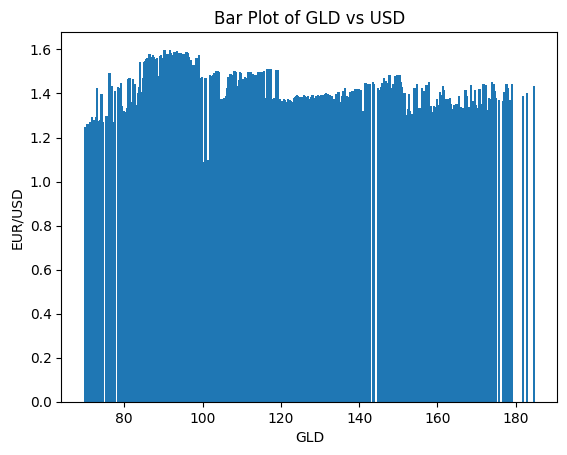

In [20]:
import matplotlib.pyplot as plt

plt.bar(df['GLD'], df['EUR/USD'], width=0.6)
plt.xlabel('GLD')
plt.ylabel('EUR/USD')
plt.title('Bar Plot of GLD vs USD')
plt.show()


<Axes: xlabel='GLD', ylabel='Density'>

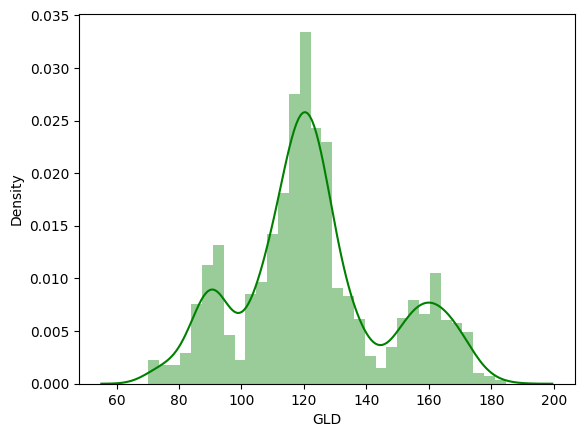

In [21]:
sns.distplot(df['GLD'],color='g')

**Splitting the Data **

In [22]:
X = df.drop('GLD',axis=1)
Y = df['GLD']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
model = RandomForestRegressor(n_estimators=100)

In [27]:
model.fit(X_train,Y_train)

RandomForestRegressor()

In [28]:
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

In [29]:
print(Y_train_pred)

[129.45639884 119.18509872 114.77300039 ... 129.14029695 118.29039911
 163.20990356]


In [30]:
print(Y_test_pred)

[127.60309971 106.59179925 121.69340008 125.02539967 114.63500047
 118.91709999 154.78819951 122.49859874 100.05159972 125.54629936
 114.74320062 117.32660127 156.65759935 117.84819958 117.757099
  92.15539925 167.57139724 124.24879973 114.57129992 172.01460091
 149.91440231 117.97270038 129.11089797 121.86859963 128.02100402
  89.9108006  118.97400078  90.11559992 120.61959882 125.27830157
  98.14799685 156.2387022  156.20399967 120.58980148 123.48239962
 149.18830165  96.83200007 114.06039957 161.83340133 116.29570068
 120.06050148 125.14610021 157.30960054 118.46670144 126.21909957
 114.82280001  86.91089923 107.34269981 115.84060079 124.90330166
 137.79850041  92.77339865 106.92930038 145.40340051 117.60330156
 155.14670281 120.36469898 165.20530094 162.48370183 131.72299806
 107.47289901 149.36589969 161.28589967  93.98509962 109.69870047
 116.10490025 121.30240052 110.62999884 119.52110166 127.39489838
  90.79660014 124.08390057 158.28820014 150.46840392  91.50629907
 123.9762997

In [31]:
from sklearn.metrics import r2_score

In [34]:
error_train = r2_score(Y_train,Y_train_pred)
error_test = r2_score(Y_test,Y_test_pred)

In [35]:
print(error_train)

0.9983037947324864


In [36]:
print(error_test)

0.9911169723829312


**Comparing The Actual Value Vs Predicted Values**

In [37]:
Y_test = list(Y_test)

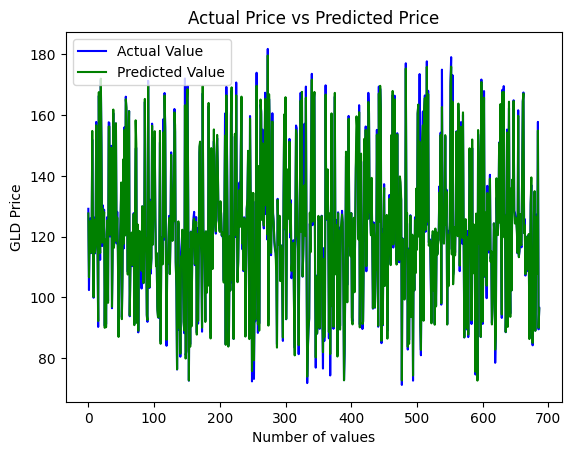

In [39]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(Y_test_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [40]:
# Get last row from dataset
last_input = X_test.iloc[-1]  # if X_test is a DataFrame

# Reshape for prediction
last_input_reshaped = last_input.values.reshape(1, -1)

# Predict
last_prediction = model.predict(last_input_reshaped)

print("Predicted value for the last input:", last_prediction[0])


Predicted value for the last input: 96.23639975999995


In [41]:
import pickle

In [42]:
with open('gold.sav','wb') as f:
  pickle.dump(model,f)

In [43]:
loaded = pickle.load(open('gold.sav','rb'))